# Data collection 

In [1]:
#parsing dates
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv",low_memory=False,parse_dates=["Unnamed: 0"])
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,WindDirection,WindSpeed
0,2018-01-01 00:00:00+00:00,-5.357727,23.148729,8.000000,2.279088
1,2018-01-01 00:10:00+00:00,-5.822360,23.039754,300.428571,2.339343
2,2018-01-01 00:20:00+00:00,-5.279409,22.948703,340.000000,2.455610
3,2018-01-01 00:30:00+00:00,-4.648054,22.966851,345.000000,2.026754
4,2018-01-01 00:40:00+00:00,-4.684632,22.936520,345.000000,1.831420


In [3]:
df.shape

(118080, 5)

In [18]:
# duplicate the date column to change it's name 
df['DateTime'] = df['Unnamed: 0'] 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
df['DateTime'].head(20)

0    2018-01-01 00:00:00+00:00
1    2018-01-01 00:10:00+00:00
2    2018-01-01 00:20:00+00:00
3    2018-01-01 00:30:00+00:00
4    2018-01-01 00:40:00+00:00
5    2018-01-01 00:50:00+00:00
6    2018-01-01 01:00:00+00:00
7    2018-01-01 01:10:00+00:00
8    2018-01-01 01:20:00+00:00
9    2018-01-01 01:30:00+00:00
10   2018-01-01 01:40:00+00:00
11   2018-01-01 01:50:00+00:00
12   2018-01-01 02:00:00+00:00
13   2018-01-01 02:10:00+00:00
14   2018-01-01 02:20:00+00:00
15   2018-01-01 02:30:00+00:00
16   2018-01-01 02:40:00+00:00
17   2018-01-01 02:50:00+00:00
18   2018-01-01 03:00:00+00:00
19   2018-01-01 03:10:00+00:00
Name: DateTime, dtype: datetime64[ns, UTC]

In [22]:
# Add datetime parameters 
df['DateTime'] = pd.to_datetime(df['DateTime'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')

df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute

# Exploratory Data analysis

In [23]:
#check for missing values
df.isna().sum()

ActivePower          23330
AmbientTemperatue    24263
WindDirection        45802
WindSpeed            23485
DateTime                 0
year                     0
month                    0
day                      0
hour                     0
minute                   0
dtype: int64

<AxesSubplot:>

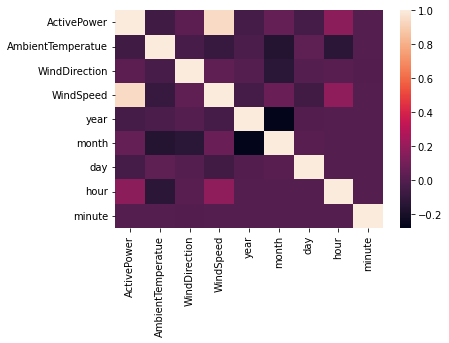

In [10]:
#correlation
import seaborn as sns
sns.heatmap(df.corr())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118080 entries, 0 to 118079
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ActivePower        94750 non-null   float64            
 1   AmbientTemperatue  93817 non-null   float64            
 2   WindDirection      72278 non-null   float64            
 3   WindSpeed          94595 non-null   float64            
 4   DateTime           118080 non-null  datetime64[ns, UTC]
 5   year               118080 non-null  int64              
 6   month              118080 non-null  int64              
 7   day                118080 non-null  int64              
 8   hour               118080 non-null  int64              
 9   minute             118080 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(5)
memory usage: 9.0 MB


In [7]:
df.describe()

,ActivePower,AmbientTemperatue,WindDirection,WindSpeed,year,month,day,hour,minute
count,94750.000000,93817.000000,72278.000000,94595.000000,118080.000000,118080.000000,118080.000000,118080.000000,118080.000000
mean,619.109805,28.774654,196.290539,5.878960,2018.664634,6.028049,15.697561,11.500000,25.000000
std,611.275373,4.369145,88.296554,2.619084,0.665140,3.559330,8.783266,6.922216,17.078324
min,-38.524659,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000
25%,79.642258,25.627428,145.000000,3.823330,2018.000000,3.000000,8.000000,5.750000,10.000000
50%,402.654893,28.340541,182.000000,5.557765,2019.000000,6.000000,16.000000,11.500000,25.000000
75%,1074.591780,31.664772,271.000000,7.506710,2019.000000,9.000000,23.000000,17.250000,40.000000
max,1779.032433,42.405597,357.000000,22.970893,2020.000000,12.000000,31.000000,23.000000,50.000000


# Visualisation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ActivePower', ylabel='Density'>

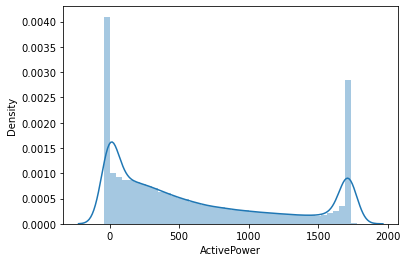

In [8]:
#Visualization
#univariate analysis
import seaborn as sns
sns.distplot(df['ActivePower'])


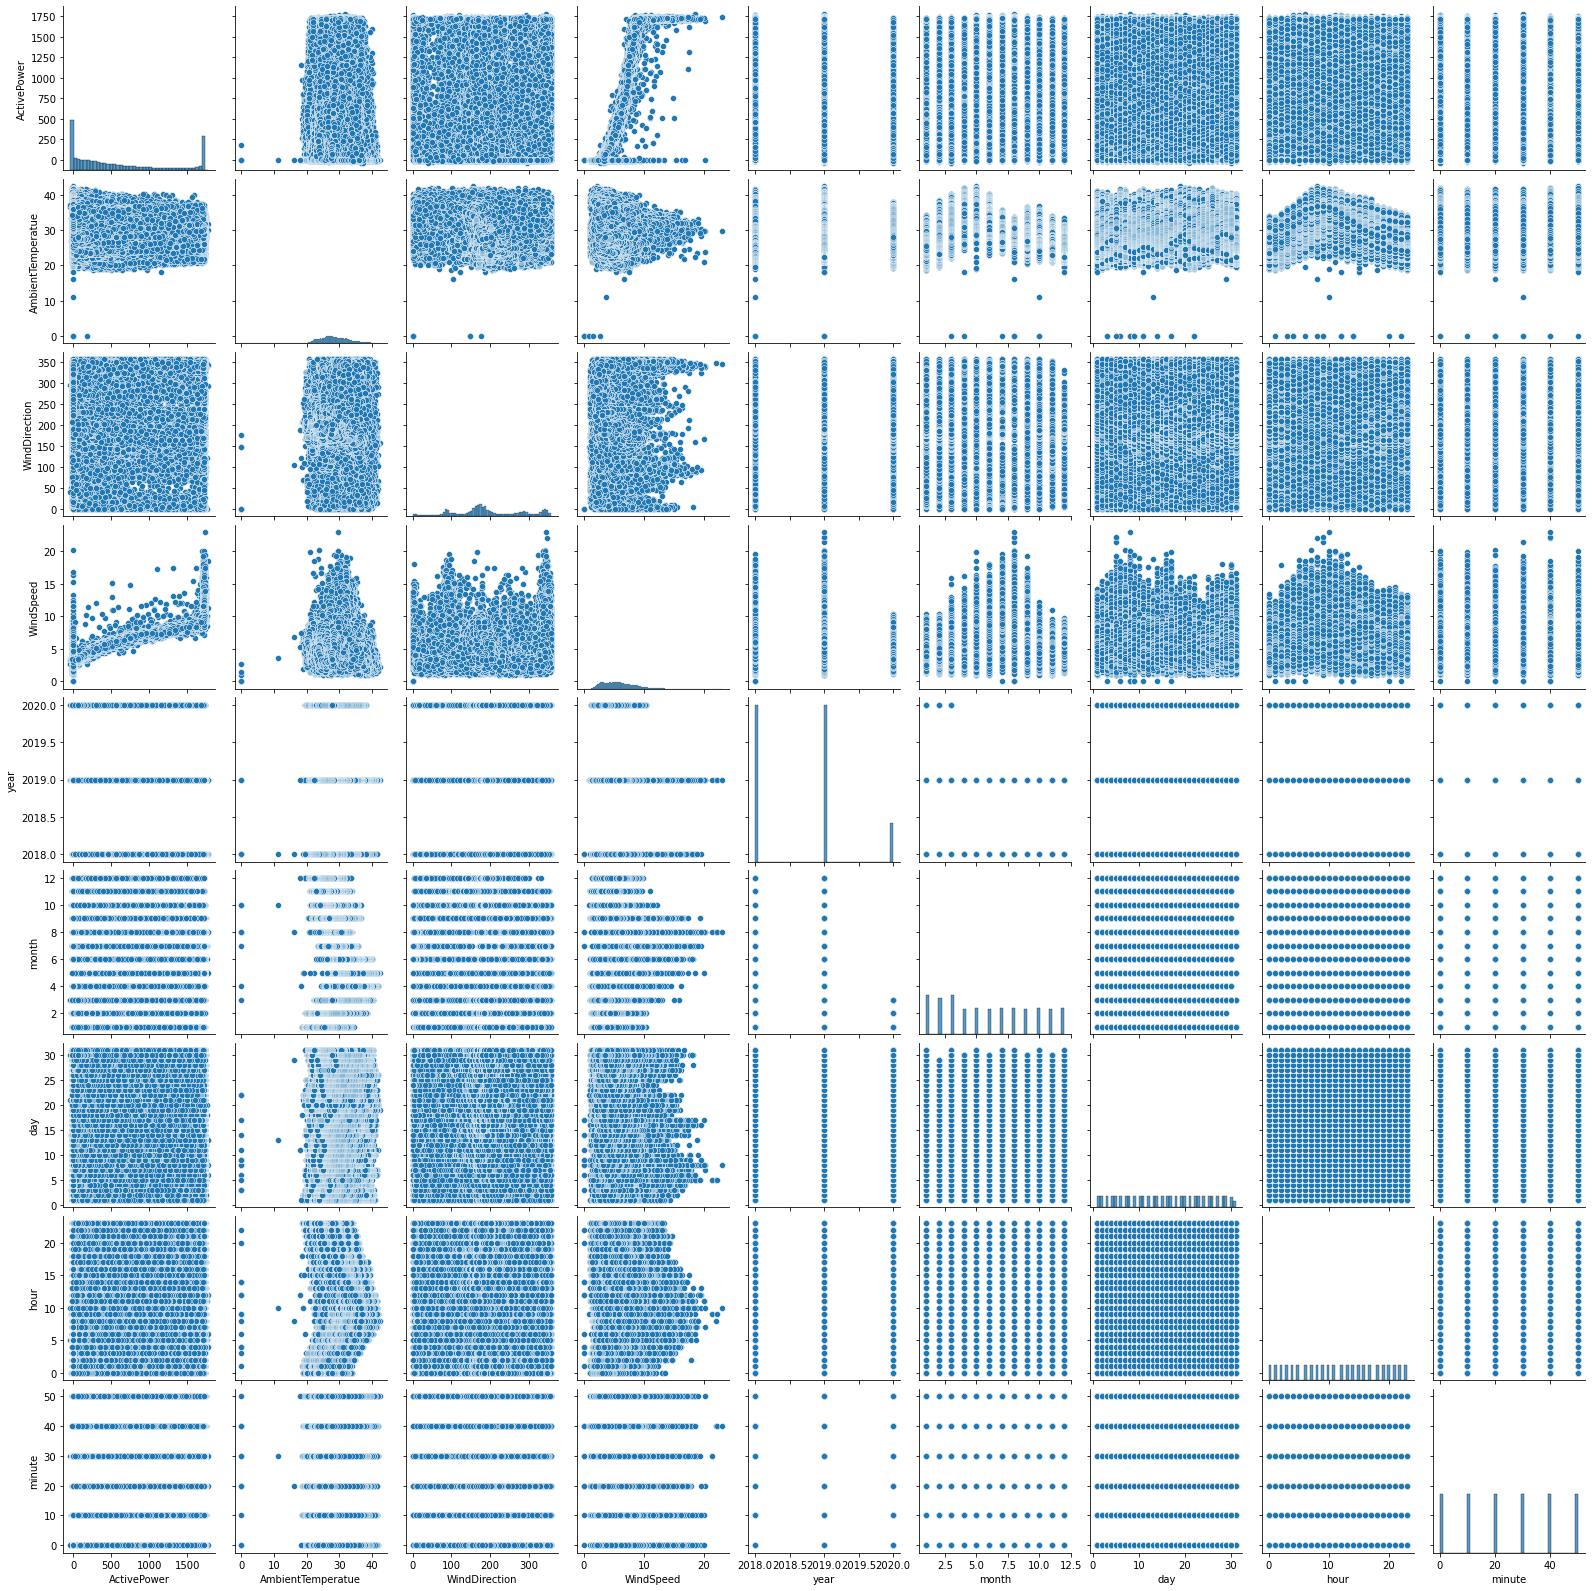

In [9]:
#multivariate analysis
sns.pairplot(df)

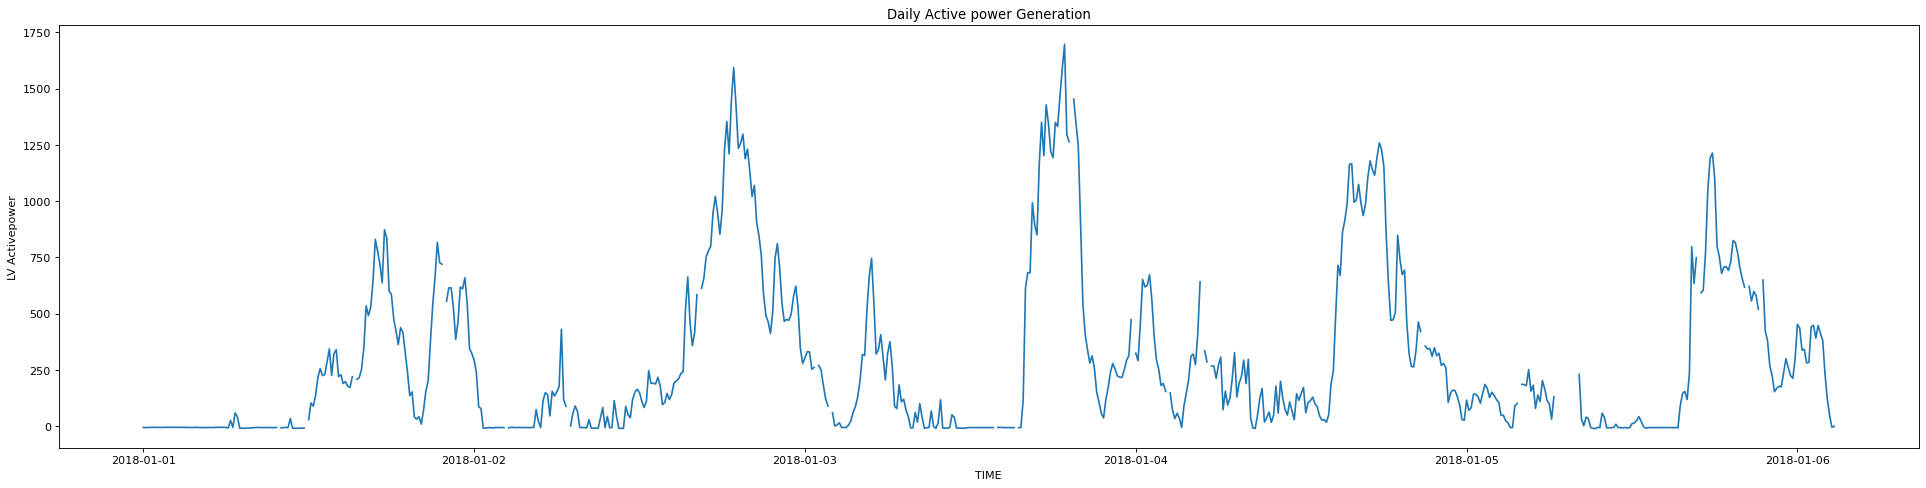

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
x = df['DateTime']
new_x = x[:900]
y = df['ActivePower']
new_y =y[:900]
figure(num = None, figsize= (30,7),dpi = 80, facecolor = 'w',edgecolor ='k')
plt.plot(new_x,new_y)
plt.xlabel("TIME")
plt.ylabel("LV Activepower")
plt.title("Daily Active power Generation")
plt.show()

# Preprocessing

In [24]:
#Handling null values

df['AmbientTemperatue'].fillna(int(df['AmbientTemperatue'].mean()), inplace=True)
df['WindDirection'].fillna(int(df['WindDirection'].mean()), inplace=True)
df['WindSpeed'].fillna(int(df['WindSpeed'].mean()), inplace=True)
df['ActivePower'].fillna(int(df['ActivePower'].mean()), inplace=True)

In [25]:
independent_features = df[['month','day','AmbientTemperatue','WindDirection','WindSpeed']]
independent_features.head()

,month,day,AmbientTemperatue,WindDirection,WindSpeed
0,1,1,23.148729,8.000000,2.279088
1,1,1,23.039754,300.428571,2.339343
2,1,1,22.948703,340.000000,2.455610
3,1,1,22.966851,345.000000,2.026754
4,1,1,22.936520,345.000000,1.831420


In [10]:
independent_features.isnull().any()

month                False
day                  False
AmbientTemperatue    False
WindDirection        False
WindSpeed            False
dtype: bool

In [26]:
target = df['ActivePower']

In [8]:
target

0         -5.357727
1         -5.822360
2         -5.279409
3         -4.648054
4         -4.684632
            ...    
118075    70.044465
118076    40.833474
118077    20.777790
118078    62.091039
118079    68.664425
Name: ActivePower, Length: 118080, dtype: float64

In [9]:
df_new = independent_features
X=np.asanyarray(df_new).astype('int')
y=np.asanyarray(target).astype('int')
print(X.shape)
print(y.shape)

(118080, 5)
(118080,)


In [10]:
target.isnull().any()

False

# Train Test Spliting

In [53]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [55]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [56]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 149.04421616824322
MSE: 43810.98108666043
RMSE: 209.31072855126283

-------Train Data--------
MAE: 149.11934775839532
MSE: 42671.04510091187
RMSE: 206.56971002766082

-----Training Accuracy-------
85.8
-----Testing Accuracy--------
85.39999999999999


In [12]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [13]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [35]:
y_train_predict

array([ 566.41033112,  618.67123154,   58.22920257, ...,  618.51181126,
         -3.41026595, 1720.17736795])

In [19]:

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 53.50913561592508
MSE: 9895.194989828915
RMSE: 99.47459469547445

-------Train Data--------
MAE: 44.57294411772965
MSE: 7134.7303058571115
RMSE: 84.46733277342852


In [20]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)


-----------Training Accuracy------------
97.6
-----------Testing Accuracy------------
96.7


In [16]:
 from sklearn.metrics import mean_squared_error,r2_score

r2_score(y_train,y_train_predict)


0.9762105307433091

In [17]:
r2_score(y_test,y_test_predict)

0.9669856209222559

In [18]:
predicted = random_forest_model.predict([[1,1,29.05256686,255,3.424813874]])


In [19]:
predicted

array([29.23038661])

In [25]:
#save the model
import joblib
joblib.dump(random_forest_model,'RFR_forecast_model.sav')

['RFR_forecast_model.sav']

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
import numpy as np


In [21]:
model = xg.XGBRegressor()

In [22]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [24]:
y_train_predict

array([ 655.7683  ,  615.2547  ,   43.755596, ...,  611.7833  ,
        -12.51607 , 1717.9994  ], dtype=float32)

In [26]:
r2_score(y_train,y_train_predict)

0.9695960085906646

In [27]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 59.05906970779872
MSE: 11101.803984338969
RMSE: 105.36509851150413

-------Train Data--------
MAE: 54.639271787726784
MSE: 9111.755416621236
RMSE: 95.45551538083714


In [34]:
predicted = model.predict([[3,30,27.91582756,203,3.475205053]])


In [35]:
predicted

array([34.47178], dtype=float32)

In [39]:
#x_std = (x-x.min(axis =0))/(x.max(axis=0)- x.min(axis =0))
from sklearn.preprocessing import MinMaxScaler
scale1 = MinMaxScaler()
scale2 = MinMaxScaler()
xscaled = scale1.fit_transform(X_train)
y_train = y_train.reshape(-1,1)
yscaled = scale2.fit_transform(y_train)

In [41]:
model.fit(xscaled,yscaled)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
y_train_scaled_predict = model.predict(xscaled)

In [45]:
r2_score(yscaled,y_train_scaled_predict)

0.9699157582990736

In [49]:
predicted = model.predict([[3,30,27.50848889,184.6666667,3.949294558]])


In [50]:
predicted*100

array([67.67403], dtype=float32)

In [51]:
#save the model
import joblib
joblib.dump(random_forest_model,'RFR_forecast_model.sav')

['xg_RFR_forecast_model.sav']

In [52]:
X_test.shape

(35424, 5)

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import joblib
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "eq_uB9S4u70ys6t-jeWs2uoNIscWVl0Gh0C9GTKlDloW"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}


app = Flask(__name__)
#model = joblib.load('xg_RFR_forecast_model.sav')
#model = joblib.load('dec_model.sav')

@app.route('/')
def home():
    return render_template('intro.html')
@app.route('/predict')
def predict():
    return render_template('predict_page.html')
@app.route('/windapi',methods=['POST'])
def windapi():
    city=request.form.get('city')
    apikey="e26bb531d3393dec23475ee08ea9559b"
    url="http://api.openweathermap.org/data/2.5/weather?q="+city+"&appid="+apikey
    resp = requests.get(url)
    resp=resp.json()
    temp = str((resp["main"]["temp"])-273.15) +" °C"
    humid = str(resp["main"]["humidity"])+" %"
    pressure = str(resp["main"]["pressure"])+" mmHG"
    speed = str((resp["wind"]["speed"])*3.6)+" Km/hr"
    direc = str((resp["wind"]["deg"]))+" deg"
    return render_template('predict_page.html', temp=temp, humid=humid, pressure=pressure,speed=speed,direction = direc)   
@app.route('/y_predict',methods=['POST'])
def y_predict():
    x_test =[]
    month_dic = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sept":9,"oct":10,"nov":11,"dec":12}
    m = request.form['month']
    mon = month_dic[m]
    print(m)
    #x_test.append(month_dic[m])
    d = int(request.form['day'])
    #x_test.append(d)
    t = float(request.form['temp'])
    #x_test.append(t)
    direc = float(request.form['direc'])
    #x_test.append(direc)
    speed= float(request.form['wind'])
    #x_test.append(speed)
    #x_test = [x_test]
    x_test =[[mon,d,t,direc,speed]]
    payload_scoring = {"input_data": [{"field": [['m','d','t','direc','speed']], "values": x_test}]}

    response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3c935904-17f3-4b91-993e-7fbf112afe46/predictions?version=2022-11-06', json=payload_scoring,headers={'Authorization': 'Bearer ' + mltoken})
    print("Scoring response")
    print(response_scoring.json())

    predictions = response_scoring.json()
    output = predictions['predictions'][0]['values'][0][0]
    print("final prediction",output)
    
    
    
    print(x_test)
    
    return render_template('predict_page.html', prediction_text='The energy predicted is {:.2f} KWh'.format(output))


if __name__ == "__main__":
    app.run(debug=False)